# Assemble CSV file of Negative Control Flow Cytometry Events

This notebook was run on the Texas Advanced Computing Center (TACC) systems to generate the file `negative_controls.csv`.  This notebook has not been updated since then, but should be runnable using the `flow_cytometry`*xx* files in the Zenodo data set with DOI 10.5281/zenodo.6562250

In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd
import math

In [2]:
import data_helpers

In [ ]:
# missing live/dead
[
    "r1ce3pjymvm3u_r1ceb3rgpe8gm",
]

In [3]:
# list of files with 'WT-Live-Control' strain data 
negative_control_files = ["r1c84xwx57y95_r1c8ejz8jfg9z",
"r1cft9hhnhjdb_r1cfwgjmz247y",
"r1cyeyjwbefaf2_r1cys7qtr6j42x",
"r1c7cpvfzqprk_r1c7fbvba55db",
"r1cdcetsvxgc2_r1cdfa6jrtssc",
"r1c8yyg9gxbme_r1c96wn43pq45",
"r1ce3pjymvm3u_r1ceb3rgpe8gm",
"r1ce3pqt45vfe_r1ce7qf5e483u",
"r1ceuhvgf7b4y_r1cf2yr353x5j",
"r1cwvvxz5d7wua_r1cx7ucsnkjfsb",
"r1c84y3r9yqxb_r1c8auwvzbgt3",
"r1c8yydkumrkr_r1c96xsxw79c9",
"r1cgbw3xk7pau_r1cgpa54x8ff3",
"r1cckyh56hjqj_r1ccpyjef2vca",
"r1cfkpp2p3kjz_r1cftpr8wxqc7",
"r1c8xx7we38vw_r1c93cukfcxqp",
"r1cbut53kpf3n_r1cc3bn2s2aj8",
"r1cdcesknarkf_r1cdfg4x5uuwp",
"r1d6r8mvznxxme_r1d8jxmssfag5w",
"r1c7cprv7fe49_r1c7jmje3ebhc",
"r1cdfr4bjcnrg_r1cdnuqex83dm",
"r1cbut3veu2z4_r1cc6efukqtxx",
"r1cfkpuz2kr6c_r1cfpvk5hjkzb",
"r1cgbw8qkp6z4_r1cgjpjx5ve76",
"r1cgbw7hjvxgx_r1cgjxrexhd4j",
"r1c5va9wyf3mx_r1c63bjzu5ruy",
"r1c5vad8u7ve2_r1c66q7cru28u",
"r1c7cpu9nj2bu_r1c7fg23qkzph",
"r1cyey8rzxq269_r1cysrdt3pvt5n",
"r1ccqfbz332u8_r1cctaf8r32rc",
"r1c8yx25rrtag_r1c96v2w8x5pq",
"r1cctw7qh3777_r1ccwxr4t3wb6",
"r1ce3p3p7j77n_r1ceevbnsqku2",
"r1cwvvwryt3q49_r1cx4ux3zcdt4w",
"r1ceuhrtvgyvd_r1cf6kx2a233e",
"r1cgbw6bqmemz_r1cgnt4s2c5ty",
"r1cbut2pdjtwv_r1cc6qzwcd4hx",
"r1cfkptta6kuc_r1cfq4k72rwba",
"r1cckyeq9r358_r1ccqgmy5ffcd",
"r1ceuhu9enre5_r1cf33y4j6dyg",
"r1cfkpq8n84aj_r1cftg78pbqd7",
"r1cft9f659y9s_r1cfx3nrnc2uw",
"r1ce3p4vgfu3p_r1ceebve8d6tc",
"r1cgbw9ww9g9h_r1cgjg8e8xeav",
"r1c5vac658fxn_r1c66qw595ydy",
"r1c8xx94j94u7_r1c93ajvdzxz5",
"r1d6r8ztq8zfa7_r1d952nn9xk753",
"r1cdfsf4ezew3_r1cdjsyza79sr",
"r1ce3phrwnkqt_r1ceb8fj2hj9a",
"r1c9tpmcezpk2_r1c9wjnedp92f",
"r1d6r8p5ddgsut_r1d8fgr2efzrhj",
"r1ce3p63vnpzq_r1cee5f7knupg",
"r1ch7zwzznes3_r1cheagmxcqvt",
"r1c8xx6qe9eea_r1c93enbf48t7",
"r1cbut6a79n9t_r1cc34mkuvzeh",
"r1cfkprehr2fj_r1cft8f7cbsp7",
"r1d6r8ykf868ep_r1d98fh76wrqp7",
"r1d6r932unhafk_r1d93nuytthhp4",
"r1cbajqru7kbe_r1cbe9p9zu6dh",
"r1cwvvvj2bh6hc_r1cx4pbeyv2q29",
"r1c84xvquwxth_r1c8ek7vcmdxh",
"r1cyeye2du6ep8_r1cysfjkjjphqj",
"r1ce3pndp353t_r1ce7xkybfnqd",
"r1c7cpqp2k6cw_r1c7jn9syrr8s",
"r1cctw6h5fsfg_r1ccx3axsj5ua",
"r1d6r59sste9m2_r1d8gf8cczkrz9",
"r1d6r58jnct63g_r1d8kxz5ndkxyh",
"r1d6r5b24f9a9z_r1d8cyvjthnvvt",
"r1cf3p48cauwv_r1cf6hech88mh",
"r1cdcerdbpda2_r1cdfphfehzq2",
"r1c84xzc5dbuv_r1c8axrywctwb",
"r1cbuszfskzjt_r1cc6ws9c3dh4",
"r1cft9gbs55yn_r1cfwthkscwsk",
"r1ce3pm76spw4_r1ceas4zgsdt5",
"r1ceuhqmu6c7w_r1cf6snbv99p8",
                         ]

negative_control_files = [x + ".csv" for x in negative_control_files]


In [4]:
DATA_DIR = os.path.abspath(os.path.expanduser('~/sd2e-projects/sd2e-project-14/xplan-reactor/data/transcriptic'))

In [5]:
def read_datafile(filename: str) -> pd.DataFrame:
    return pd.read_csv(os.path.join(DATA_DIR, filename), index_col=0)

In [10]:
%pdb on
first_file = negative_control_files.pop()
df = read_datafile(first_file)
if 'well' not in df.columns:
    data_helpers.df_create_well_column(df)
df = df[df['strain_name'] == 'WT-Live-Control']
cols = set(df.columns)

defective = []

for x in negative_control_files:
    new_df = read_datafile(x)
    if 'well' not in new_df.columns:
        data_helpers.df_create_well_column(new_df)
    assert set(new_df.columns) == cols, f"Columns of {x} are different from the reference set of {first_file}."
    new_df = new_df[new_df['strain_name'] == 'WT-Live-Control']
    if any(new_df['live'].isna()):
        print(f"{x} has some measurements not flagged as live/dead.")
        defective.append(x)
    df = pd.concat([df, new_df])
    new_df = None

Automatic pdb calling has been turned ON
r1ce3pjymvm3u_r1ceb3rgpe8gm.csv has some measurements not flagged as live/dead.
r1ce3pqt45vfe_r1ce7qf5e483u.csv has some measurements not flagged as live/dead.
r1ceuhvgf7b4y_r1cf2yr353x5j.csv has some measurements not flagged as live/dead.
r1c84y3r9yqxb_r1c8auwvzbgt3.csv has some measurements not flagged as live/dead.
r1c8yydkumrkr_r1c96xsxw79c9.csv has some measurements not flagged as live/dead.
r1cgbw3xk7pau_r1cgpa54x8ff3.csv has some measurements not flagged as live/dead.
r1cckyh56hjqj_r1ccpyjef2vca.csv has some measurements not flagged as live/dead.
r1c7cprv7fe49_r1c7jmje3ebhc.csv has some measurements not flagged as live/dead.
r1cdfr4bjcnrg_r1cdnuqex83dm.csv has some measurements not flagged as live/dead.
r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv has some measurements not flagged as live/dead.
r1c5vad8u7ve2_r1c66q7cru28u.csv has some measurements not flagged as live/dead.
r1c7cpu9nj2bu_r1c7fg23qkzph.csv has some measurements not flagged as live/dead.

In [13]:
def_df = read_datafile('r1ce3pjymvm3u_r1ceb3rgpe8gm.csv')
def_df['live'].fillna(3, inplace=True)
def_df[['live','strain_name']].groupby('live').count()

,strain_name
live,
1.0,1699255
3.0,910745


In [11]:
defective

['r1ce3pjymvm3u_r1ceb3rgpe8gm.csv',
 'r1ce3pqt45vfe_r1ce7qf5e483u.csv',
 'r1ceuhvgf7b4y_r1cf2yr353x5j.csv',
 'r1c84y3r9yqxb_r1c8auwvzbgt3.csv',
 'r1c8yydkumrkr_r1c96xsxw79c9.csv',
 'r1cgbw3xk7pau_r1cgpa54x8ff3.csv',
 'r1cckyh56hjqj_r1ccpyjef2vca.csv',
 'r1c7cprv7fe49_r1c7jmje3ebhc.csv',
 'r1cdfr4bjcnrg_r1cdnuqex83dm.csv',
 'r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv',
 'r1c5vad8u7ve2_r1c66q7cru28u.csv',
 'r1c7cpu9nj2bu_r1c7fg23qkzph.csv',
 'r1cyey8rzxq269_r1cysrdt3pvt5n.csv',
 'r1ccqfbz332u8_r1cctaf8r32rc.csv',
 'r1c8yx25rrtag_r1c96v2w8x5pq.csv',
 'r1cctw7qh3777_r1ccwxr4t3wb6.csv',
 'r1ceuhrtvgyvd_r1cf6kx2a233e.csv',
 'r1cckyeq9r358_r1ccqgmy5ffcd.csv',
 'r1ceuhu9enre5_r1cf33y4j6dyg.csv',
 'r1cfkpq8n84aj_r1cftg78pbqd7.csv',
 'r1cft9f659y9s_r1cfx3nrnc2uw.csv',
 'r1c8xx94j94u7_r1c93ajvdzxz5.csv',
 'r1cdfsf4ezew3_r1cdjsyza79sr.csv',
 'r1c9tpmcezpk2_r1c9wjnedp92f.csv',
 'r1c8xx6qe9eea_r1c93enbf48t7.csv',
 'r1cbut6a79n9t_r1cc34mkuvzeh.csv',
 'r1cfkprehr2fj_r1cft8f7cbsp7.csv',
 'r1d6r8ykf868ep_r1d98fh76

In [6]:
df.reset_index(drop=True, inplace=True)
negative_control_df = df

In [7]:
negative_control_df.to_csv('negative_controls.csv')

In [8]:
df.loc[:, 'media'] = df['growth_media_1'].astype(pd.CategoricalDtype(sorted(df['growth_media_1'].unique())))

In [9]:
df.at[:, 'inc_temp_degrees'] = np.vectorize(lambda x: int(x.split("_")[1]))(df['inc_temp'])

In [10]:
df.at[:, 'inc_time_1_hrs'] = np.vectorize(lambda x: int(x.split(":")[0]))(df['inc_time_1'])

In [11]:
df.at[:, 'inc_time_2_hrs'] = np.vectorize(lambda x: int(x.split(":")[0]))(df['inc_time_2'])

In [12]:
df.at[:, 'well'] = np.vectorize(lambda x: x.split("_")[-1])(df['id'])

In [13]:
df.loc[:, 'replicate'] = df.groupby(['lab_id', 'plate_id', 'well']).ngroup()

In [14]:
df.loc[:, 'event'] = df.groupby(['lab_id', 'plate_id', 'well']).cumcount()

In [15]:
df.drop(columns=['lab', 'plan'], inplace=True)

In [16]:
reindexed = df.set_index(['strain_name', 'inc_temp_degrees', 'inc_time_2_hrs', 'od', 'lab_id', 'plate_id', 'well', 'replicate', 'event'])

In [17]:
reindexed.to_csv('negative_controls_reindexed.csv')

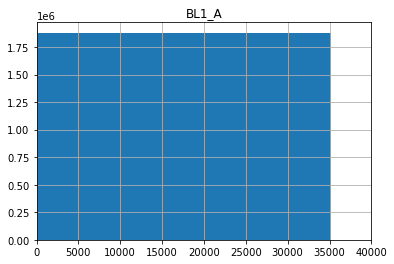

In [18]:
axeses = df.hist(column='BL1_A').flatten()
axeses[0].set_xlim(0, 40_000);

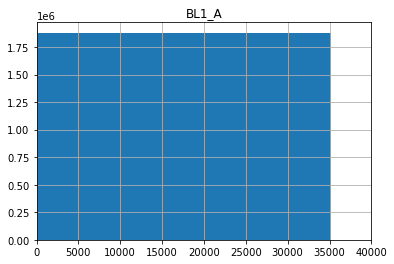

In [19]:
axeses = negative_control_df.hist(column='BL1_A').flatten()
axeses[0].set_xlim(0, 40_000);

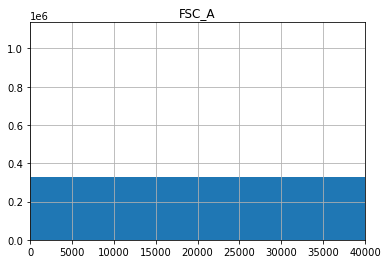

In [20]:
axeses = df.hist(column='FSC_A').flatten()
axeses[0].set_xlim(0, 40_000);

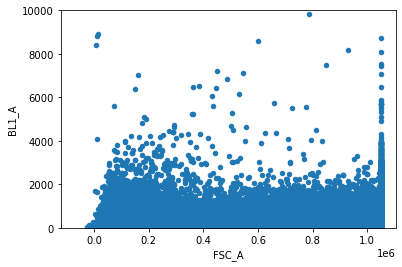

In [21]:
ax = df.plot(kind='scatter', x='FSC_A', y='BL1_A')
ax.set_ylim(0, 10_000);

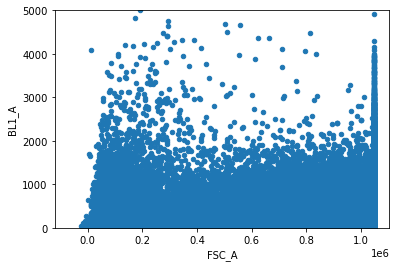

In [22]:
ax = df.plot(kind='scatter', x='FSC_A', y='BL1_A')
ax.set_ylim(0, 5_000);

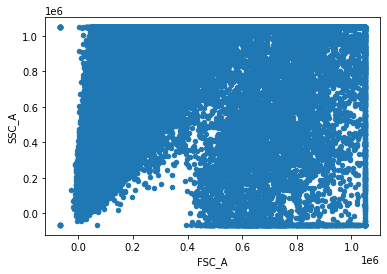

In [23]:
ax = df.plot(kind='scatter', x='FSC_A', y='SSC_A')